In [13]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
bag_of_words = pd.read_csv("../data/bag_of_words.csv")
bag_of_words = bag_of_words.drop("Unnamed: 0", axis=1)

In [3]:
bag_of_words.head()

,Words,Count,SongCount,SemiAnnualSpan
0,times,2487,1341.0,120.0
1,are,14319,5777.0,120.0
2,far,2202,1322.0,120.0
3,between,1042,668.0,119.0
4,and,127508,18459.0,120.0


In [24]:
i = 0.9
while i < 1:
    print(i, np.quantile(bag_of_words["Count"], i))
    i+=0.01

0.9 32.0
0.91 38.0
0.92 46.0
0.93 57.0
0.9400000000000001 72.0
0.9500000000000001 95.0
0.9600000000000001 134.0
0.9700000000000001 211.0
0.9800000000000001 375.6200000000026
0.9900000000000001 1008.8600000000297


### KM Cluster on the lyrics words

In [30]:
bag_of_words.shape

(60620, 4)

In [25]:
def KMWordCluster(df, n_cluster):
    data = df[["Count", "SongCount", "SemiAnnualSpan"]]
    labels = df["Words"]
    word_cluster = KMeans(n_clusters=n_cluster, random_state=48, n_init=100).fit(data)
    pred_clusters = word_cluster.labels_
    print(Counter(pred_clusters))
    cluster_labels=[[] for i in range(n_cluster)]
    for i, j in enumerate(pred_clusters):
        cluster_labels[j].append(labels[i])
    plt.figure(figsize=(13.8, 6))
    for i in range(n_cluster):
        plt.scatter(df[df["Words"].isin(cluster_labels[i])]["Count"], df[df["Words"].isin(cluster_labels[i])]["SongCount"], label="{}".format(i))
    plt.legend(fontsize=14)
    plt.xlabel("WordCount", fontsize=14)
    plt.ylabel("SongCount", fontsize=14)
    plt.title("Word KM Clustering Results(K={})".format(n_cluster), fontsize=16)
    plt.show()

Counter({0: 60560, 2: 53, 1: 7})


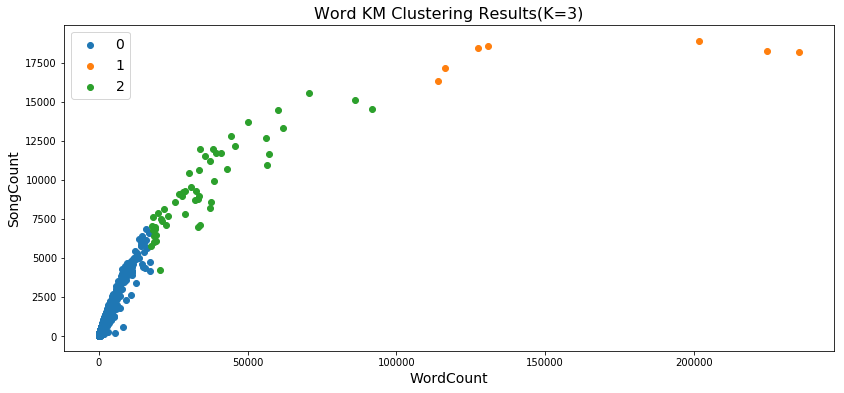

Counter({0: 60545, 2: 65, 1: 7, 3: 3})


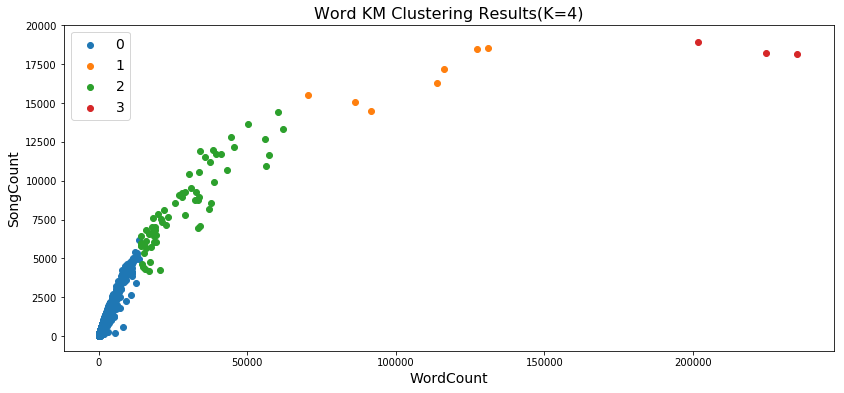

Counter({0: 60467, 3: 110, 2: 34, 1: 6, 4: 3})


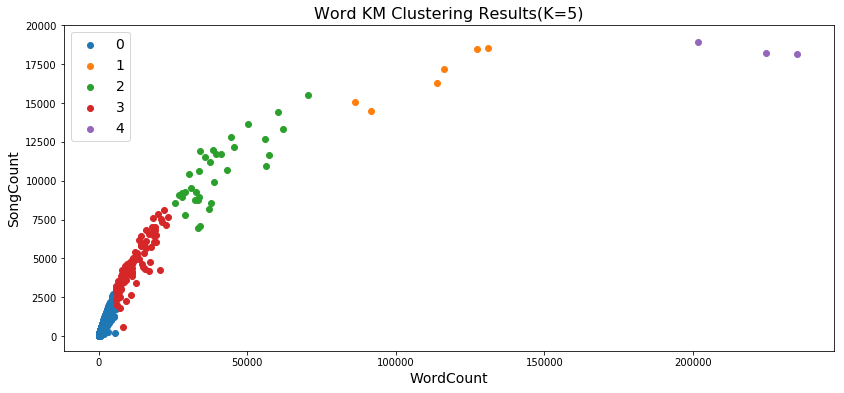

Counter({0: 60225, 5: 290, 4: 64, 2: 32, 1: 6, 3: 3})


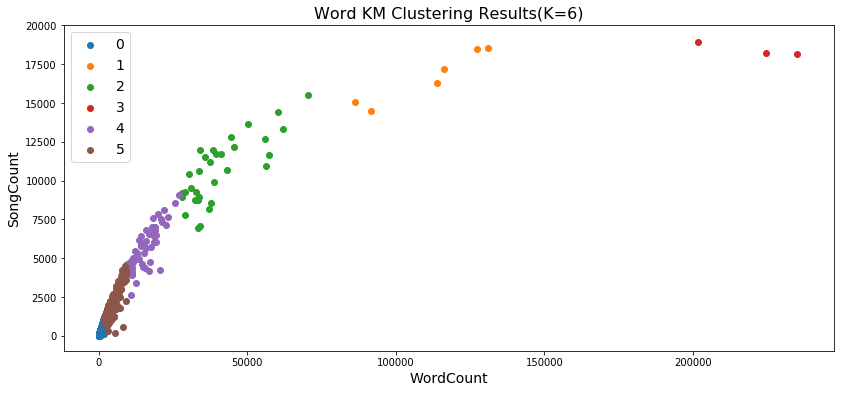

Counter({0: 60215, 5: 294, 3: 68, 6: 28, 2: 8, 1: 4, 4: 3})


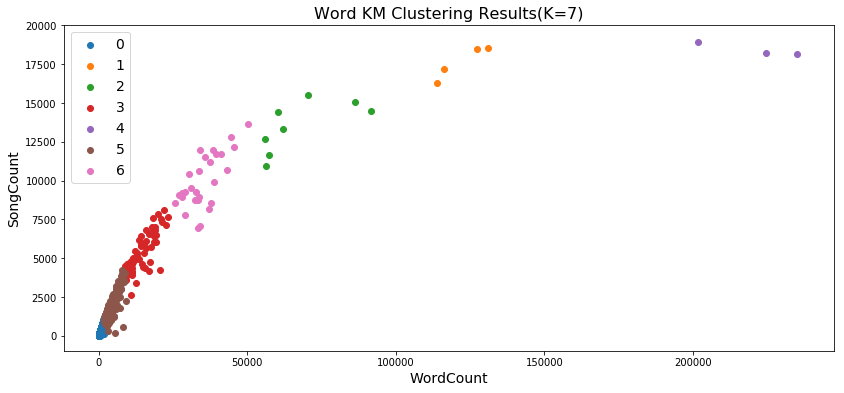

Counter({0: 60215, 4: 294, 5: 68, 2: 27, 7: 7, 1: 4, 3: 3, 6: 2})


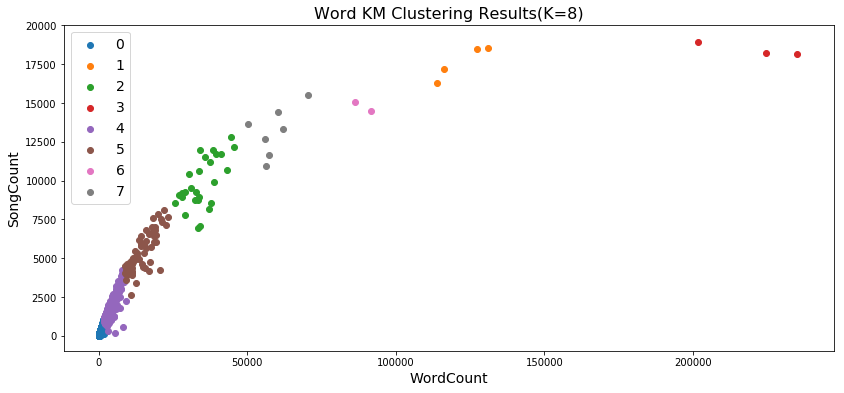

Counter({0: 60116, 6: 351, 4: 76, 7: 35, 2: 26, 8: 7, 3: 4, 1: 3, 5: 2})


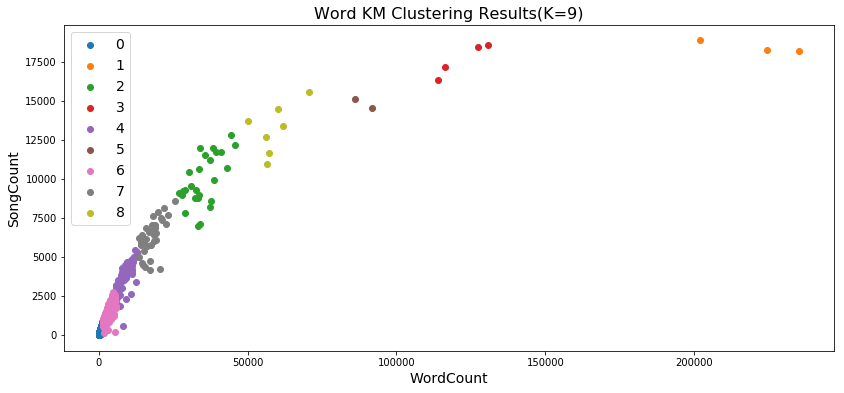

Counter({0: 59816, 9: 509, 5: 163, 7: 57, 3: 33, 6: 26, 2: 7, 4: 4, 1: 3, 8: 2})


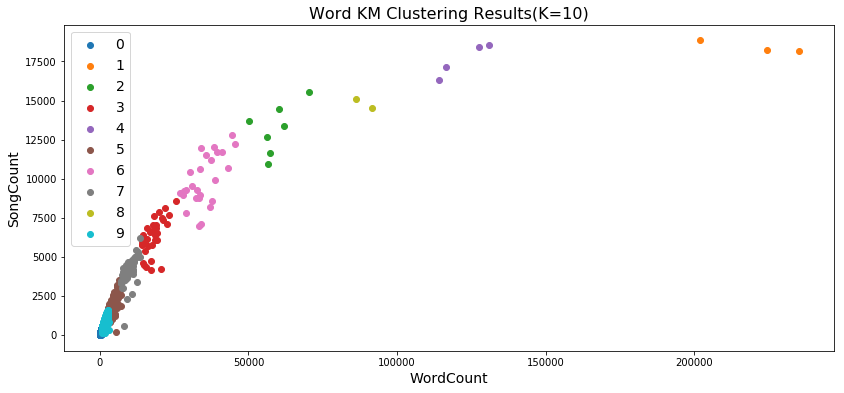

In [26]:
for i in range(3, 11):
    KMWordCluster(bag_of_words, i)

In [35]:
bag_of_words_selected = bag_of_words[(bag_of_words["Count"] != 1) & (bag_of_words["Count"] <= np.quantile(bag_of_words["Count"], 0.98))].reset_index(drop=True)
bag_of_words_selected.shape

(33596, 4)

Counter({0: 19187, 1: 12931, 2: 1478})


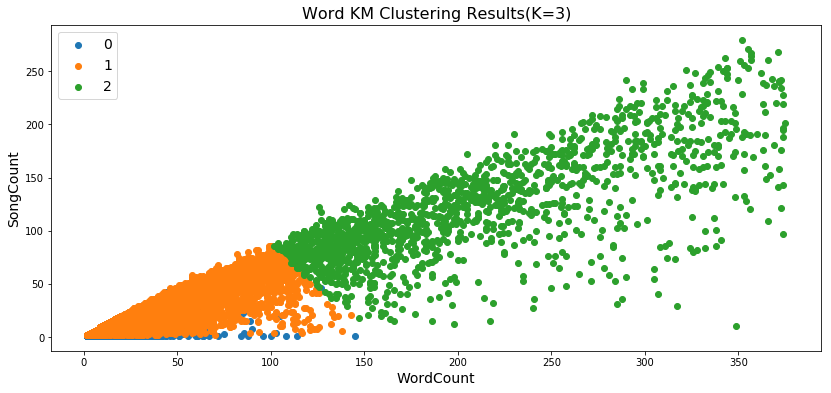

Counter({0: 18504, 1: 12114, 2: 2196, 3: 782})


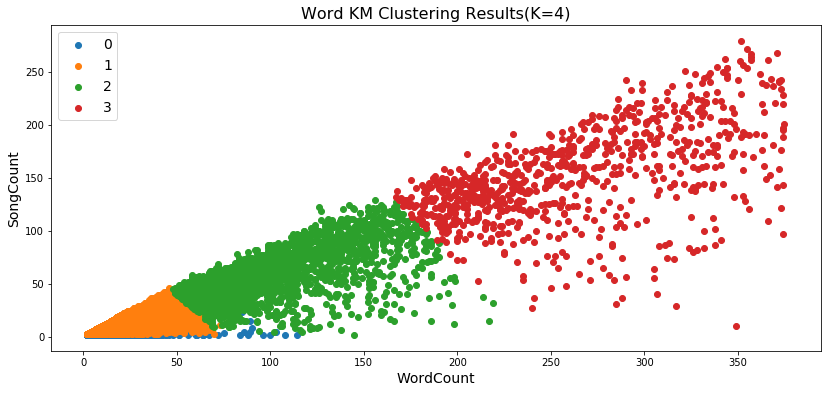

Counter({0: 13574, 2: 8826, 4: 8472, 1: 1965, 3: 759})


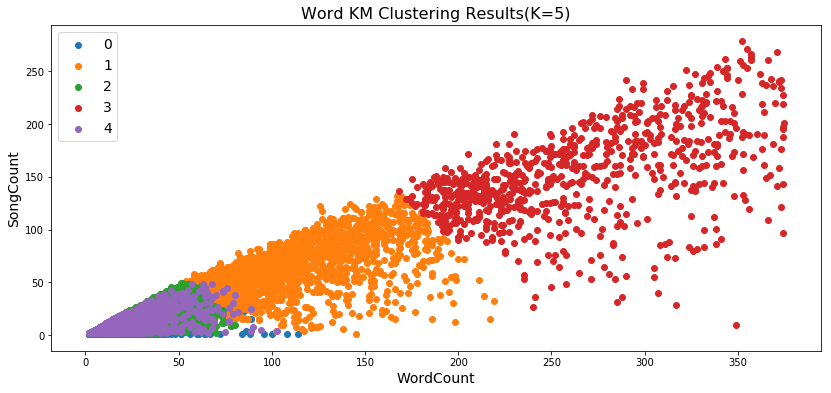

Counter({2: 13369, 5: 8206, 0: 8146, 3: 2402, 1: 956, 4: 517})


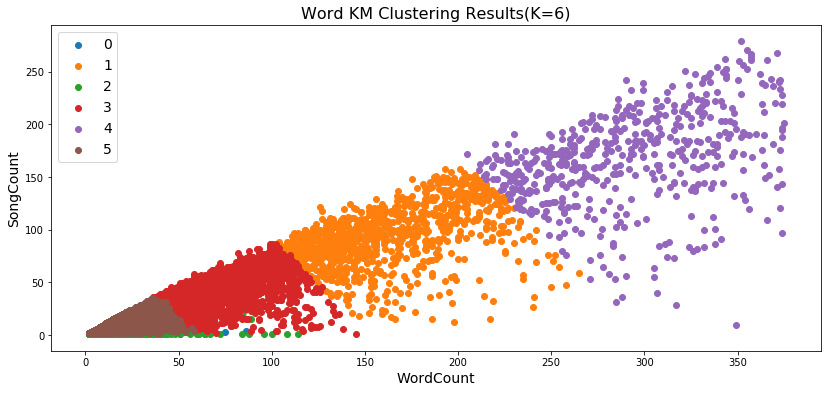

Counter({1: 13132, 3: 7994, 0: 7641, 4: 2633, 6: 1211, 2: 609, 5: 376})


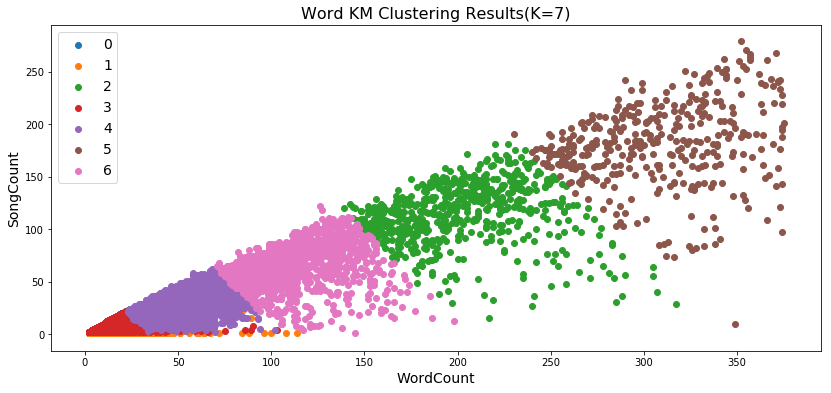

Counter({2: 11921, 6: 6774, 5: 5706, 0: 4948, 4: 2235, 3: 1092, 7: 557, 1: 363})


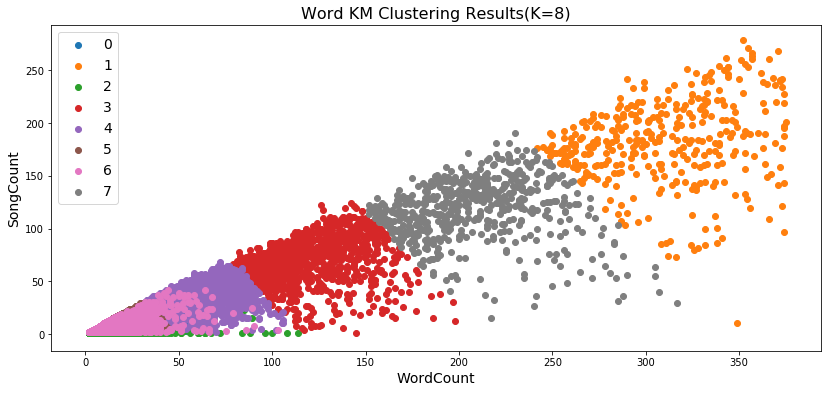

Counter({1: 11748, 8: 6583, 0: 5370, 3: 4839, 4: 2381, 6: 1234, 2: 694, 7: 462, 5: 285})


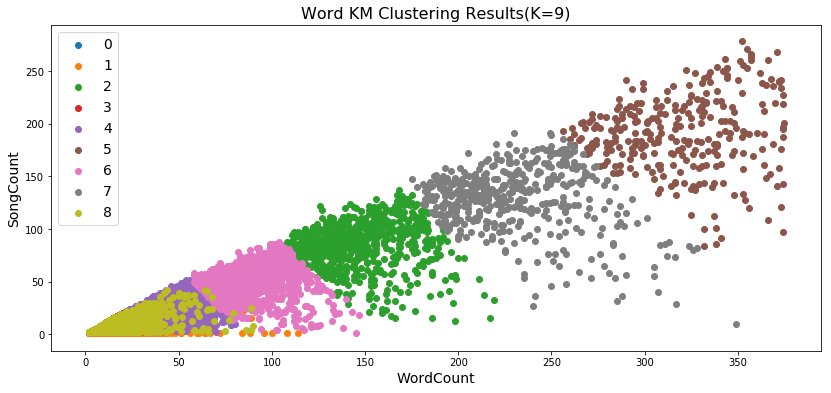

Counter({4: 10667, 9: 4921, 1: 4611, 7: 4425, 3: 4182, 8: 2188, 0: 1169, 6: 682, 2: 459, 5: 292})


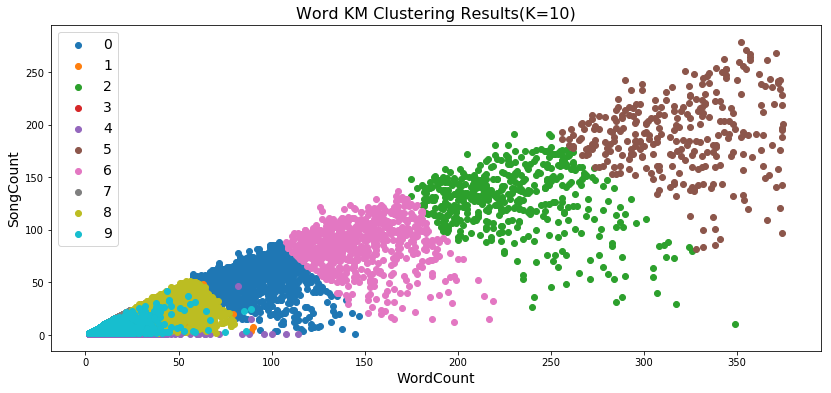

In [36]:
for i in range(3, 11):
    KMWordCluster(bag_of_words_selected, i)

In [32]:
bag_of_words_selected.head()

,Words,Count,SongCount,SemiAnnualSpan
16,regret,266,187.0,119.0
28,exception,62,22.0,106.0
29,'till,267,171.0,119.0
45,penance,4,4.0,41.0
47,decide,236,163.0,118.0
